In [149]:
## importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
## loading dataset

df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


/Users/moritz/devtools/anaconda3/envs/datasc/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of Reviews')

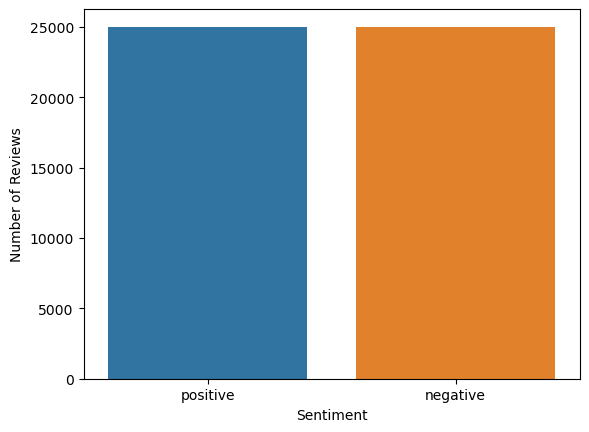

In [154]:
## plot displaying the number of positive and negative reviews

sns.countplot(df['sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

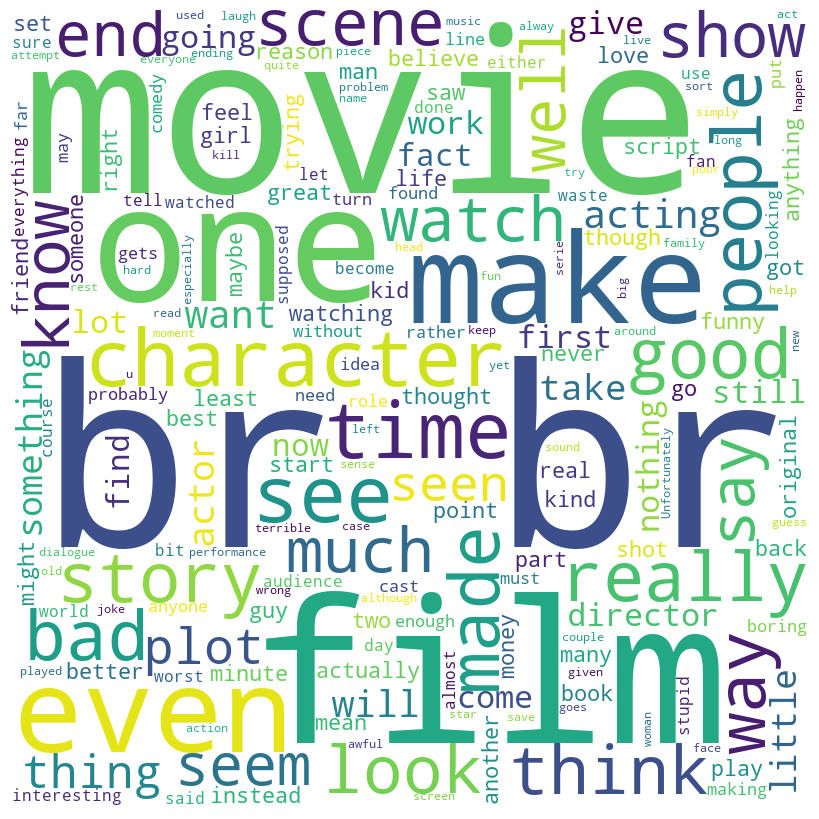

In [170]:
## Wordcloud of negative reviews
## code altered from https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

from wordcloud import WordCloud, STOPWORDS
pos_df = df[df['sentiment']=='negative']

pos_df.head()
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(' '.join(pos_df['review']))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:>

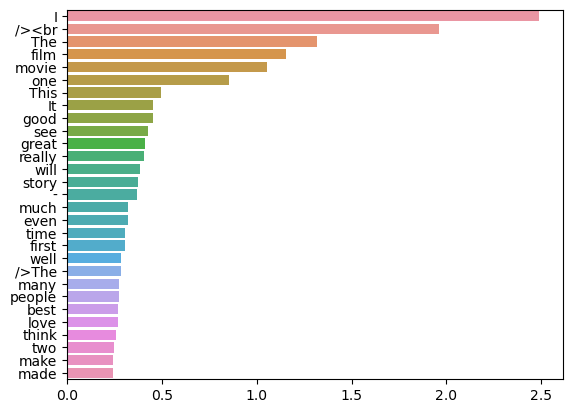

In [177]:
## Wordcount normalized as a bar graph for positive reviews
## code altered from https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

from collections import Counter

pos_df = df[df['sentiment']=='positive']

counter=Counter(' '.join(pos_df['review']).split())
most=counter.most_common()
x=[]
y=[]
for word,count in most[:100]:
    if (word not in STOPWORDS) :
        x.append(word)
        y.append(count/25000)
sns.barplot(x=y,y=x)

In [10]:
## Chaning sentiment from positive and negative to 0 and 1

le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
independent = df['review']
dependent = df['sentiment']

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moritz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
## Removing stop words html tags and stemming the words

ps = PorterStemmer()
corpus = []

for i in range(len(independent)):
    review = re.sub("<[^<>]*>","", independent[i])
    review = re.sub("[^a-zA-Z]"," ", review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [120]:
## Removing stop words html tags and lemmatizing the words

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus2 = []

for review in independent:
    review = re.sub("<[^<>]*>","", review)
    review = re.sub("[^a-zA-Z]"," ", review)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus2.append(review)

In [121]:
corpus2[:4]

['one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz 

In [104]:
corpus[:4]

['one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side',
 'won

## Creating Vectorizer

In [122]:
cv = TfidfVectorizer(max_features=15000)
x = cv.fit_transform(corpus2).toarray()

In [123]:
x.shape

(50000, 15000)

## Different training and testing splits

In [124]:
x_train , x_test , y_train , y_test = train_test_split(x, dependent, train_size=.5, random_state=42)

In [146]:
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(x, dependent, train_size=.75, random_state=42)

## Multinomial Naive Bayes Classifier

In [125]:
mnb = MultinomialNB()
mnb.fit(X=x_train2, y=y_train2)

MultinomialNB()

In [126]:
pred = mnb.predict(x_test2)

In [127]:
print(accuracy_score(y_test2 , pred))
print(confusion_matrix(y_test2 , pred))
print(classification_report(y_test2 , pred))

0.86052
[[10796  1687]
 [ 1800 10717]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12483
           1       0.86      0.86      0.86     12517

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [42]:
# Saving model and vectorizer

with open(r"vectorizer.pickle", "wb") as f:
   ...:     pickle.dump(cv, f)
with open(r"model.pickle", "wb") as f:
   ...:     pickle.dump(mnb, f)

In [205]:
# Function to test model

def test_model(sentence):

    with open(r"vectorizer.pickle", "rb") as f:
        c = pickle.load(f)
    with open(r"model.pickle", "rb") as f:
        model = pickle.load(f)

    sen = c.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [206]:
print(test_model('Worst movie ever.'))

Negative review


# Fitting, Testing of Logistic Regression and Creation of a confusion matrix; 89.6% acc

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5992
           1       0.91      0.89      0.90      6508

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

0.89592


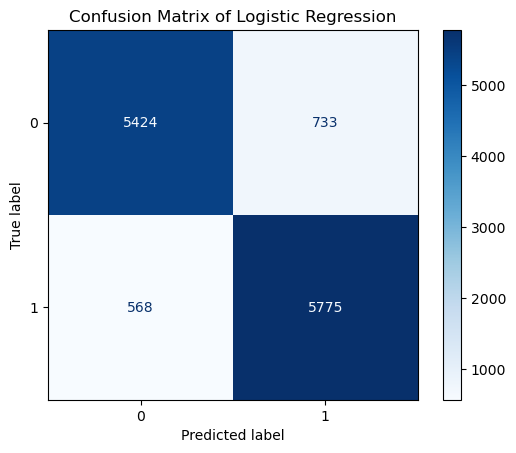

In [185]:
from sklearn.linear_model import LogisticRegression

lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2)

pred2 = lr2.predict(x_test2)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred2,y_test2))
print(accuracy_score(y_test2 , pred2))

# Confusion Matrix Code taken from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.metrics import ConfusionMatrixDisplay

cmd_lr = ConfusionMatrixDisplay.from_predictions(y_pred=pred2, y_true=y_test2, cmap=plt.cm.Blues)#)confusion_matrix=confusion_matrix(y_test2 , pred))
cmd_lr.ax_.set_title('Confusion Matrix of Logistic Regression')
plt.show()

### User Testing of Logistic Regression

In [202]:
def test_model_lr(sentence):
    sen = cv.transform([sentence]).toarray()
    res = lr2.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [204]:
print(test_model_lr('This movie was honestly great.'))

Positive review


# Fitting a Passive Aggressive Classifier
### Took 30s

In [137]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=15000)
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(max_iter=15000)

### Testing the model (0.5s) 85.8% acc

In [138]:
predictions = pac.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(predictions,y_test))
print(accuracy_score(y_test , predictions))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86     12311
           1       0.86      0.85      0.86     12689

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000

0.85792


# Training a Gaussian Classifier
### Took 150 mins

In [139]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(x_train, y_train)

GaussianProcessClassifier()

### Testing the model (took 130 mins) 88.2% acc

In [140]:
predictions = gpc.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(predictions,y_test))
print(accuracy_score(y_test , predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     11968
           1       0.90      0.87      0.89     13032

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

0.88276


# Training a Support Vector Machine
### Took 300 mins

In [178]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train2, y_train2)

SVC()

### Testing the model (took 80 mins) 90.1% acc

In [179]:
pred = svc.predict(x_test2)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred,y_test2))
print(accuracy_score(y_test2 , pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5988
           1       0.92      0.89      0.90      6512

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500

0.90168


### Output the Confusion Matrix as a graphic

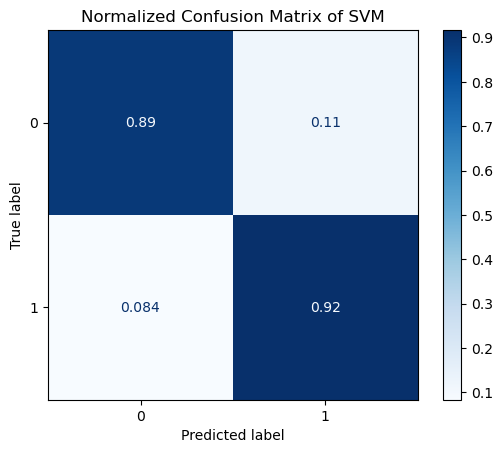

In [190]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay.from_predictions(y_pred=pred, y_true=y_test2, cmap=plt.cm.Blues, normalize='true')#)confusion_matrix=confusion_matrix(y_test2 , pred))
cmd.ax_.set_title('Normalized Confusion Matrix of SVM')
plt.show()
pred_svc = pred

### Creating method to test own sentences and test it

In [193]:
def test_model_svc(sentence):
    sen = cv.transform([sentence]).toarray()
    res = svc.predict(sen)[0]
    if res == 1:
        return 'Positive review'
    else:
        return 'Negative review'

In [199]:
print(test_model_svc('The worst movie I have seen to date.'))

Negative review
